In [ ]:
pip install mpu

     |████████████████████████████████| 69 kB 4.3 MB/s 


In [ ]:
pip install imbalanced-learn

# Loading Data #

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt 
import seaborn as sns
import mpu

In [ ]:
train_set = pd.read_csv('/content/drive/MyDrive/AML/Project/fraudTrain.csv')
test_set = pd.read_csv('/content/drive/MyDrive/AML/Project/fraudTest.csv')

# EDA #

In [ ]:
train_set.shape

(1296675, 23)

In [ ]:
test_set.shape

(555719, 23)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
train_set.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Checking Null values ##

In [ ]:
train_set.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [ ]:
train_set.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## Percentage distribution of fraudulent transactions ##

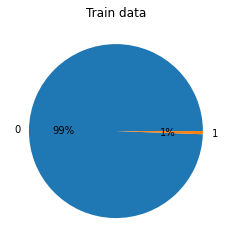

<Figure size 432x288 with 0 Axes>

In [ ]:
f = train_set.groupby(['is_fraud'])\
.size().reset_index().rename(columns={0:'count'})

plt.pie(f['count'], labels = f['is_fraud'],autopct='%.0f%%' ) 
# displaying chart
plt.title("Train data")
plt.show()
plt.savefig('datadistribution_train.png')

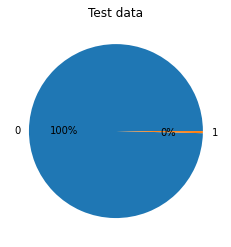

<Figure size 432x288 with 0 Axes>

In [ ]:
f_t = test_set.groupby(['is_fraud'])\
.size().reset_index().rename(columns={0:'count'})

plt.pie(f_t['count'], labels = f_t['is_fraud'],autopct='%.000f%%' ) 
# displaying chart
plt.title("Test data")
plt.show()
plt.savefig('datadistribution_test.png')

In [ ]:
f_t

,is_fraud,count
0,0,553574
1,1,2145


In [ ]:
f

,is_fraud,count
0,0,1289169
1,1,7506


## Creating new columns ##

### Date, time, hour extraction from trans_date_trans_time

In [ ]:
#converting to datetime

train_set['trans_date_trans_time'] = pd.to_datetime(train_set['trans_date_trans_time'])
train_set['trans_date'] = pd.to_datetime(train_set['trans_date_trans_time'],'%Y-%M-%d').dt.date
train_set['trans_date'] = pd.to_datetime(train_set['trans_date'])
train_set['dob'] = pd.to_datetime(train_set['dob'])
#train_set['trans_date_ym'] = pd.to_datetime(train_set['trans_date_trans_time'],'%Y-%M').dt.to_period('M')
train_set['trans_date_ym'] = train_set.trans_date_trans_time.values.astype('datetime64[M]') 

train_set["time"] = pd.to_datetime(train_set["trans_date_trans_time"],"%H:%M:%S").dt.time
train_set['time_hour'] = pd.to_datetime(train_set['trans_date_trans_time']).dt.hour

train_set['trans_month'] = pd.DatetimeIndex(train_set['trans_date']).month
train_set['trans_year'] = pd.DatetimeIndex(train_set['trans_date']).year


test_set['trans_date_trans_time'] = pd.to_datetime(test_set['trans_date_trans_time'])
test_set['trans_date'] = pd.to_datetime(test_set['trans_date_trans_time'],'%Y-%M-%d').dt.date
test_set['trans_date'] = pd.to_datetime(test_set['trans_date'])
test_set['dob'] = pd.to_datetime(test_set['dob'])
#test_set['trans_date_ym'] = pd.to_datetime(test_set['trans_date_trans_time'],'%Y-%M').dt.to_period('M')
test_set['trans_date_ym'] = test_set.trans_date_trans_time.values.astype('datetime64[M]') 

test_set["time"] = pd.to_datetime(test_set["trans_date_trans_time"],"%H:%M:%S").dt.time
test_set['time_hour'] = pd.to_datetime(test_set['trans_date_trans_time']).dt.hour



### Calculating age at the time of transaction from dob and binning into levels ###

In [ ]:
#Calculating age
train_set['age'] = (train_set['trans_date_trans_time'] - train_set['dob']).astype('<m8[Y]')
pd.set_option('float_format', '{:f}'.format)

#converting age to factors.

bins = [0, 19, 29, 39, 49, 59, 69,79,89,100,1000]
labels = ['under 20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','> 90','> 100']
train_set['age_binned'] = pd.cut(train_set['age'], bins=bins, labels=labels)


test_set['age'] = (test_set['trans_date_trans_time'] - test_set['dob']).astype('<m8[Y]')
pd.set_option('float_format', '{:f}'.format)
test_set['age_binned'] = pd.cut(test_set['age'], bins=bins, labels=labels)

In [ ]:
train_set[['cc_num','trans_date_trans_time','dob','age','age_binned']]

,cc_num,trans_date_trans_time,dob,age,age_binned
0,2703186189652095,2019-01-01 00:00:18,1988-03-09,30.000000,30-40
1,630423337322,2019-01-01 00:00:44,1978-06-21,40.000000,40-50
2,38859492057661,2019-01-01 00:00:51,1962-01-19,56.000000,50-60
3,3534093764340240,2019-01-01 00:01:16,1967-01-12,51.000000,50-60
4,375534208663984,2019-01-01 00:03:06,1986-03-28,32.000000,30-40
...,...,...,...,...,...
1296670,30263540414123,2020-06-21 12:12:08,1961-11-24,58.000000,50-60
1296671,6011149206456997,2020-06-21 12:12:19,1979-12-11,40.000000,40-50
1296672,3514865930894695,2020-06-21 12:12:32,1967-08-30,52.000000,50-60
1296673,2720012583106919,2020-06-21 12:13:36,1980-08-18,39.000000,30-40


In [ ]:
train_set['trans_date_ym']

0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
1296670   2020-06-01
1296671   2020-06-01
1296672   2020-06-01
1296673   2020-06-01
1296674   2020-06-01
Name: trans_date_ym, Length: 1296675, dtype: datetime64[ns]

### Calculating distance between customer and merchant from lat-long

In [ ]:
# calculating distance between merchant and customer in 
def hav(x):
  return mpu.haversine_distance((x['lat'], x['long']), (x['merch_lat'], x['merch_long']))

train_set['dist'] = train_set.apply(hav, axis=1)
#converting to miles
train_set['dist'] = train_set['dist'] * 0.621371 

test_set['dist'] = test_set.apply(hav, axis=1)
#converting to miles
test_set['dist'] = test_set['dist'] * 0.621371 

### Binning Distance variable ###


In [ ]:
train_set['dist'].describe()

count   1296675.000000
mean         47.295437
std          18.092419
min           0.013828
25%          34.383510
50%          48.610942
75%          61.207074
max          94.521200
Name: dist, dtype: float64

In [ ]:
bins = [0, 25, 50, 75, 100]
labels = ['under 25mi','25-50mi','50-75mi','75-100mi']
train_set['distance_binned'] = pd.cut(train_set['dist'], bins=bins, labels=labels)
test_set['distance_binned'] = pd.cut(test_set['dist'], bins=bins, labels=labels)

### Binning Population Density ###

In [ ]:
train_set['city_pop'].describe()

count   1296675.000000
mean      88824.440563
std      301956.360689
min          23.000000
25%         743.000000
50%        2456.000000
75%       20328.000000
max     2906700.000000
Name: city_pop, dtype: float64

In [ ]:
bins = [0,5000,10000,50000,100000,1000000,2906700]
labels = ['under 5k','under 10k','10-50k','50-100k','100k-1M','1M-3M']
train_set['pop_binned'] = pd.cut(train_set['city_pop'], bins=bins, labels=labels)
test_set['pop_binned'] = pd.cut(test_set['city_pop'], bins=bins, labels=labels)

### Transaction period ###

Immediate or later

In [ ]:
train_set["freq"] = train_set.groupby(by="cc_num")["unix_time"].diff() #Getting difference in transaction times
train_set.freq = train_set.freq.apply(lambda x: float((x/60)/60)) #Converting to minutes

test_set["freq"] = test_set.groupby(by="cc_num")["unix_time"].diff() #Getting difference in transaction times
test_set.freq = test_set.freq.apply(lambda x: float((x/60)/60)) #Converting to minutes

In [ ]:
train_set['freq'].describe()

count   1295692.000000
mean          9.023615
std          13.150180
min           0.000000
25%           1.672778
50%           4.607500
75%          11.186111
max         372.630833
Name: freq, dtype: float64

In [ ]:
#Filling NA values with -1 -- first transaction
train_set['freq'] = train_set['freq'].fillna(-1)
bins = [-1,0,0.01,1,5,10,15,20,24,373]
labels = ['First','Sametime','under 1H','1-5H','5-10H','10-15H','15-20H','20-24H','After 1 day']
train_set['freq_binned'] = pd.cut(train_set['freq'], bins=bins, labels=labels)
train_set['freq_binned'] = train_set['freq_binned'].fillna('First')
test_set['freq'] = test_set['freq'].fillna(-1)
test_set['freq_binned'] = pd.cut(test_set['freq'], bins=bins, labels=labels)
test_set['freq_binned'] = test_set['freq_binned'].fillna('First')

In [ ]:
train_set[['cc_num','trans_date_trans_time','trans_num','freq','freq_binned','is_fraud']].loc[train_set['cc_num']==4613314721966]

,cc_num,trans_date_trans_time,trans_num,freq,freq_binned,is_fraud
1023,4613314721966,2019-01-01 12:51:40,ec78ae12af778ef797c8f9ee88c8eafd,-1.000000,First,0
2449,4613314721966,2019-01-02 01:06:37,e8a81877ae9a0a7f883e15cb39dc4022,12.249167,10-15H,1
2546,4613314721966,2019-01-02 03:38:03,397894a5c4c02e3c61c784001f0f14e4,2.523889,1-5H,1
2937,4613314721966,2019-01-02 13:38:08,248c2746e78f2ec713df51254ff1b302,10.001389,10-15H,1
3527,4613314721966,2019-01-02 23:52:08,2f7d497f607396ab669c14c2abe3886f,10.233333,10-15H,1
...,...,...,...,...,...,...
1294188,4613314721966,2020-06-20 14:48:13,c9c948c0e821788f9cb23a98a5d34063,8.132778,5-10H,0
1295285,4613314721966,2020-06-20 23:45:25,b4ebd0e21876fdd83a338c500afe0f3f,8.953333,5-10H,0
1295849,4613314721966,2020-06-21 05:01:19,749e47993e56f2326b3c68ae9369121a,5.265000,5-10H,0
1296075,4613314721966,2020-06-21 06:51:51,6809f5d3b13019823987ef1c88efb101,1.842222,1-5H,0


In [ ]:
train_set.groupby(['freq_binned'])['is_fraud'].sum()

freq_binned
First            75
Sametime         64
under 1H       3194
1-5H           1872
5-10H           657
10-15H          486
15-20H          554
20-24H          384
After 1 day     220
Name: is_fraud, dtype: int64

### Subsetting only fraudulent transactions ###

In [ ]:
#only for fradulent transactions
fraud_trans = train_set.loc[train_set['is_fraud'] == 1]


In [ ]:
fraud_trans['cc_num']

2449          4613314721966
2472        340187018810220
2523        340187018810220
2546          4613314721966
2553        340187018810220
                 ...       
1295399    3524574586339330
1295491    3524574586339330
1295532    4005676619255478
1295666    3560725013359375
1295733    4005676619255478
Name: cc_num, Length: 7506, dtype: int64

# Univariate Analysis #

## Age analysis ##


*   Distributions
*   Overall range and fraudulent transactions range



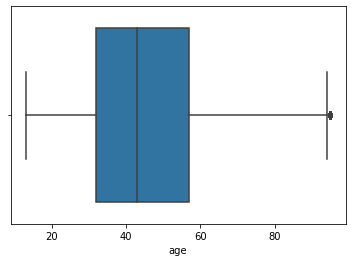

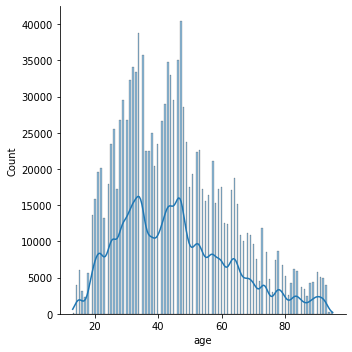

In [ ]:
sns.boxplot(x = train_set['age'])
sns.displot(train_set['age'],kde = True)
#on observing the histogram it is better to bin the age groups, it is bimodal and right skewed.

In [ ]:
train_set['age'].describe()

count   1296675.000000
mean         45.497407
std          17.397305
min          13.000000
25%          32.000000
50%          43.000000
75%          57.000000
max          95.000000
Name: age, dtype: float64

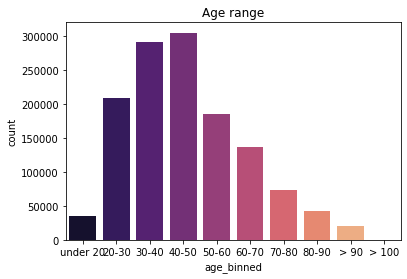

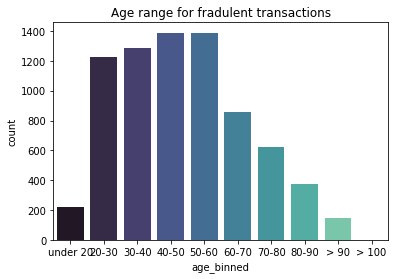

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x = 'age_binned', data = train_set, palette = 'magma')
plt.title('Age range')
plt.show()
plt.savefig('age_forall.jpeg')

sns.countplot(x = 'age_binned', data = fraud_trans, palette = 'mako')
plt.title('Age range for fradulent transactions')
plt.show()
plt.savefig('age_fraud.jpeg')

## Amount distributions ##



*   Overall Amount of transactions
*   Fraudulent transaction amount range
*   Gender divison in fraudulent transaction by amount




In [ ]:
fraud_trans['amt'].describe(percentiles = [0.25,0.5,0.75,0.90,0.95,0.99])

count   7506.000000
mean     531.320092
std      390.560070
min        1.060000
25%      245.662500
50%      396.505000
75%      900.875000
90%     1024.595000
95%     1083.985000
99%     1179.690000
max     1376.040000
Name: amt, dtype: float64

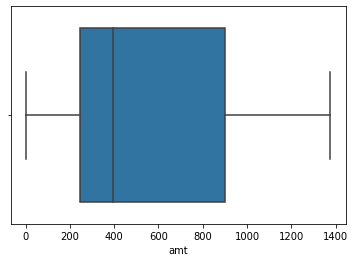

In [ ]:
#checking amounts, 75% are under $900, and 99% are under $1180
sns.boxplot(x = fraud_trans['amt'])
plt.savefig('amount_boxplot.png')



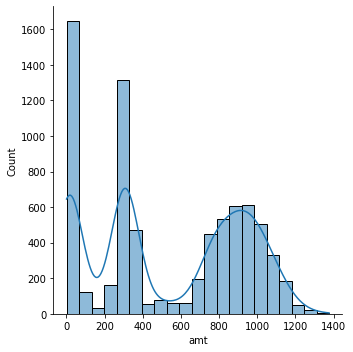

In [ ]:
sns.displot(fraud_trans['amt'], kde = True)
plt.savefig('amount_displot.png')

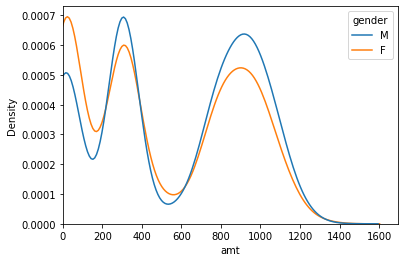

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.kdeplot(fraud_trans.amt,hue=fraud_trans.gender)
plt.xlim(left=0)
plt.show()
plt.savefig('fraud_amount_gender.png')

## Number of transactions ##


*   By category overall
*   By category fraudulent



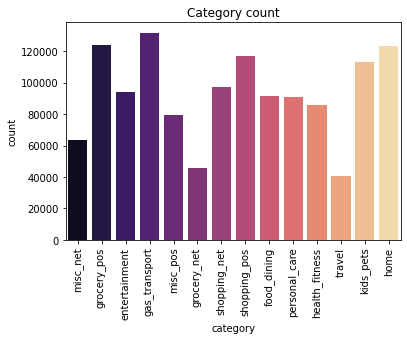

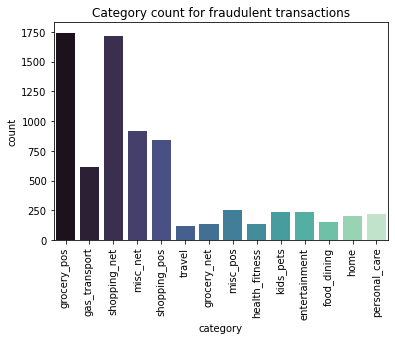

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x = 'category', data = train_set, palette = 'magma')
plt.title('Category count')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()
plt.savefig('overall_category.png')

sns.countplot(x = 'category', data = fraud_trans, palette = 'mako')
plt.title('Category count for fraudulent transactions')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()
plt.savefig('fraud_category.png')

## Transactions by credit cards ##


*   Overall Transactions
*   Fraudulent Transactions



In [ ]:
overall_count = train_set.groupby(['trans_date_ym'])[['cc_num','trans_num']].nunique().reset_index()
fraud_count = fraud_trans.groupby(['trans_date_ym'])[['cc_num','trans_num']].nunique().reset_index()

In [ ]:
overall_count

,trans_date_ym,cc_num,trans_num
0,2019-01-01,913,52525
1,2019-02-01,918,49866
2,2019-03-01,916,70939
3,2019-04-01,913,68078
4,2019-05-01,910,72532
5,2019-06-01,908,86064
6,2019-07-01,910,86596
7,2019-08-01,911,87359
8,2019-09-01,913,70652
9,2019-10-01,912,68758


In [ ]:
all_trans_count = train_set.groupby(['cc_num'])['trans_num','is_fraud'].agg({'trans_num' : 'count','is_fraud' : 'sum'}).reset_index()
all_trans_count['percentage'] = (all_trans_count['is_fraud'] *100)/all_trans_count['trans_num']
all_trans_count.rename(columns = {'trans_num':'num_of_trans', 'is_fraud':'fraud_count'}, inplace = True)
all_trans_count.sort_values(by = 'percentage', ascending = False)


all_trans_count_test = test_set.groupby(['cc_num'])['trans_num','is_fraud'].agg({'trans_num' : 'count','is_fraud' : 'sum'}).reset_index()
all_trans_count_test['percentage'] = (all_trans_count_test['is_fraud'] *100)/all_trans_count_test['trans_num']
all_trans_count_test.rename(columns = {'trans_num':'num_of_trans', 'is_fraud':'fraud_count'}, inplace = True)
all_trans_count_test.sort_values(by = 'percentage', ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,cc_num,num_of_trans,fraud_count,percentage
388,2242176657877538,10,10,100.000000
93,4295296907373,6,6,100.000000
579,3588001568691267,14,14,100.000000
339,372965408103277,10,10,100.000000
611,4087542780207162,9,9,100.000000
...,...,...,...,...
359,376262134119629,435,0,0.000000
362,376944481517097,208,0,0.000000
363,377026671291680,1124,0,0.000000
364,377113842678100,899,0,0.000000


In [ ]:
non_fraud_transactions = all_trans_count.loc[all_trans_count['percentage'] < 0.1]
non_fraud_transactions

non_fraud_transactions_test = all_trans_count_test.loc[all_trans_count_test['percentage'] < 0.1]

In [ ]:
fraud_transactions = all_trans_count.loc[all_trans_count['fraud_count'] > 0]
fraud_transactions.sort_values(by = 'percentage', ascending = False)

fraud_transactions_test = all_trans_count_test.loc[all_trans_count_test['fraud_count'] > 0]
fraud_transactions_test.sort_values(by = 'percentage', ascending = False)

,cc_num,num_of_trans,fraud_count,percentage
229,180020605265701,12,12,100.000000
132,4883407061576,9,9,100.000000
510,3550412175018089,11,11,100.000000
16,503851367360,10,10,100.000000
495,3540416671210051,8,8,100.000000
...,...,...,...,...
427,2712209726293386,1308,5,0.382263
529,3560725013359375,866,2,0.230947
678,4514242065619750,888,2,0.225225
457,3518234918950662,1054,2,0.189753


In [ ]:
only_fraud_trans = fraud_transactions.loc[fraud_transactions['percentage']== 100]
only_fraud_trans.sort_values(by = 'percentage', ascending = False)

only_fraud_trans_test = fraud_transactions_test.loc[fraud_transactions_test['percentage']== 100]
only_fraud_trans.sort_values(by = 'percentage', ascending = False)

,cc_num,num_of_trans,fraud_count,percentage
8,501818133297,8,8,100.000000
794,5144043920225212,10,10,100.000000
751,4734310647841293,7,7,100.000000
737,4669558618943766,10,10,100.000000
721,4575255480814133,9,9,100.000000
...,...,...,...,...
340,349813394357327,8,8,100.000000
327,345225948700767,10,10,100.000000
308,340214844585279,11,11,100.000000
307,340187018810220,7,7,100.000000


In [ ]:
train_set = train_set.merge(all_trans_count, on = 'cc_num')
test_set = test_set.merge(all_trans_count_test, on = 'cc_num')

In [ ]:
train_set.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_date               0
trans_date_ym            0
time                     0
time_hour                0
trans_month              0
trans_year               0
age                      0
age_binned               0
dist                     0
distance_binned          0
pop_binned               0
freq                     0
freq_binned              0
num_of_trans             0
f

In [ ]:
train_set.loc[train_set['cc_num'] == 501818133297]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,age,age_binned,dist,distance_binned,pop_binned,freq,freq_binned,num_of_trans,fraud_count,percentage
1296562,1150401,2020-04-24 22:09:30,501818133297,"fraud_Langworth, Boehm and Gulgowski",shopping_net,977.700000,Juan,Price,M,0984 Amanda Corners Apt. 297,...,78.000000,70-80,34.243549,25-50mi,100k-1M,-1.000000,First,8,8,100.000000
1296563,1150657,2020-04-25 01:17:26,501818133297,"fraud_Kovacek, Dibbert and Ondricka",grocery_pos,305.170000,Juan,Price,M,0984 Amanda Corners Apt. 297,...,78.000000,70-80,43.622993,25-50mi,100k-1M,3.132222,1-5H,8,8,100.000000
1296564,1150769,2020-04-25 03:10:19,501818133297,fraud_Rau and Sons,grocery_pos,336.510000,Juan,Price,M,0984 Amanda Corners Apt. 297,...,78.000000,70-80,62.919020,50-75mi,100k-1M,1.881389,1-5H,8,8,100.000000
1296565,1150935,2020-04-25 05:38:39,501818133297,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,7.900000,Juan,Price,M,0984 Amanda Corners Apt. 297,...,78.000000,70-80,60.844584,50-75mi,100k-1M,2.472222,1-5H,8,8,100.000000
1296566,1152262,2020-04-25 22:31:56,501818133297,fraud_Bradtke PLC,grocery_pos,302.590000,Juan,Price,M,0984 Amanda Corners Apt. 297,...,78.000000,70-80,41.293586,25-50mi,100k-1M,16.888056,15-20H,8,8,100.000000
1296567,1152273,2020-04-25 22:35:37,501818133297,fraud_Jast Ltd,shopping_net,1084.020000,Juan,Price,M,0984 Amanda Corners Apt. 297,...,78.000000,70-80,4.513122,under 25mi,100k-1M,0.061389,under 1H,8,8,100.000000
1296568,1152303,2020-04-25 22:51:37,501818133297,fraud_Auer-West,shopping_net,954.230000,Juan,Price,M,0984 Amanda Corners Apt. 297,...,78.000000,70-80,51.853344,50-75mi,100k-1M,0.266667,under 1H,8,8,100.000000
1296569,1152360,2020-04-25 23:21:53,501818133297,"fraud_Reichert, Rowe and Mraz",shopping_net,978.420000,Juan,Price,M,0984 Amanda Corners Apt. 297,...,78.000000,70-80,40.293882,25-50mi,100k-1M,0.504444,under 1H,8,8,100.000000


In [ ]:
#Credit card numbers are not unique. Names have repitions too.
train_set.groupby(['cc_num','first','last'])\
.size()\
.reset_index()\
.rename(columns={0:'count'})\
.sort_values(by = 'count', ascending = False)

,cc_num,first,last,count
28,571365235126,Barbara,Taylor,3123
943,4512828414983801773,Monica,Cohen,3123
222,36722699017270,Jessica,Perez,3119
272,213112402583773,Ana,Howell,3117
531,3545109339866548,Keith,Sanders,3113
...,...,...,...,...
957,4714017207228610634,Rachel,Johnson,7
307,340187018810220,Misty,Hart,7
269,180097223252063,Samantha,Ramirez,7
882,6577777028615915,Kelly,Lawrence,7


### Fraudulent transactions by distance ###

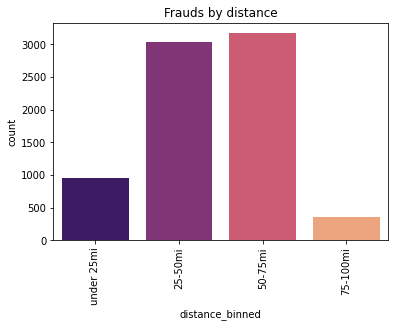

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x = 'distance_binned', data = fraud_trans, palette = 'magma')
plt.title('Frauds by distance')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()
plt.savefig('fraud_dist.png')

In [ ]:
sns.countplot(x = 'freq_binned', data = fraud_trans, palette = 'magma')
plt.title('Frauds frequency')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()
plt.savefig('fraud_dist.png')

In [ ]:
fraud_trans[['cc_num','lat','long','merch_lat','merch_long','dist','distance_binned']]

,cc_num,lat,long,merch_lat,merch_long,dist,distance_binned
2449,4613314721966,35.994600,-81.726600,36.430124,-81.179483,42.845669,25-50mi
2472,340187018810220,29.440000,-98.459000,29.819364,-99.142791,48.719274,25-50mi
2523,340187018810220,29.440000,-98.459000,29.273085,-98.836360,25.483786,25-50mi
2546,4613314721966,35.994600,-81.726600,35.909292,-82.091010,21.217206,under 25mi
2553,340187018810220,29.440000,-98.459000,29.786426,-98.683410,27.470465,25-50mi
...,...,...,...,...,...,...,...
1295399,3524574586339330,27.633000,-80.403100,26.888686,-80.834389,57.848231,50-75mi
1295491,3524574586339330,27.633000,-80.403100,28.216707,-79.855648,52.378159,50-75mi
1295532,4005676619255478,30.459000,-90.902700,29.700456,-91.361632,59.158317,50-75mi
1295666,3560725013359375,31.859900,-102.741300,32.675272,-103.484949,71.142896,50-75mi


### Fraudulent transactions by state ###

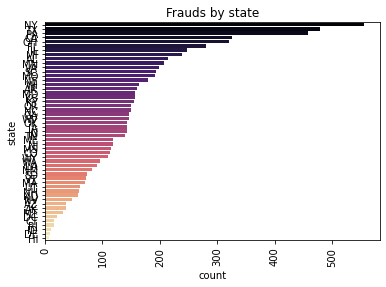

<Figure size 1080x864 with 0 Axes>

In [ ]:
sns.countplot(y = 'state', data = fraud_trans, palette = 'magma',order=fraud_trans['state'].value_counts().index)
plt.title('Frauds by state')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.rcParams["figure.figsize"] = (15,12)
plt.show()
plt.savefig('frauds_by_state.png')

# Time series EDA #

## Fraudulent transactions by hour ##

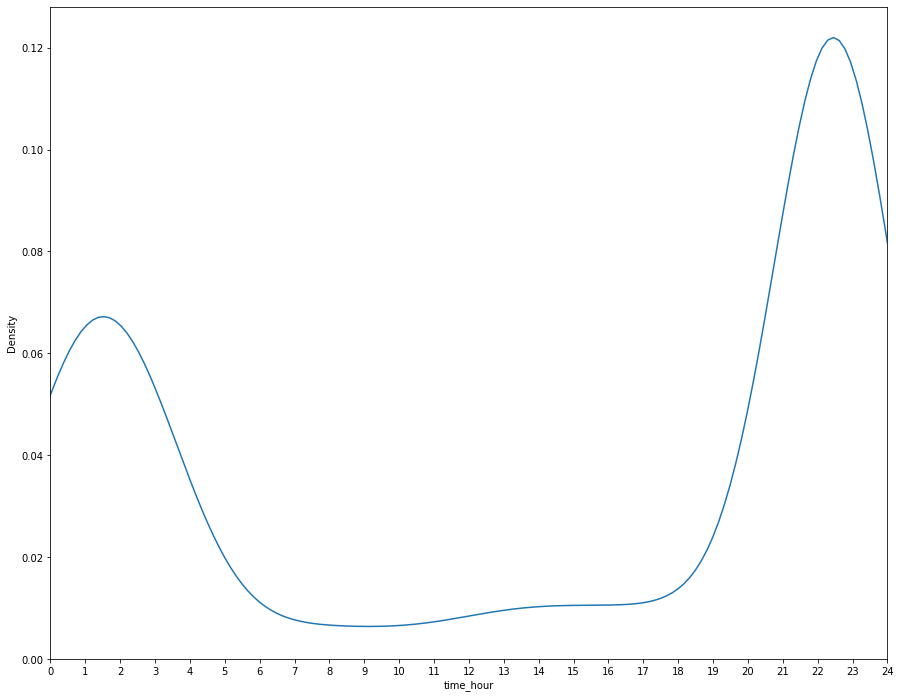

<Figure size 576x360 with 0 Axes>

In [ ]:
sns.kdeplot(fraud_trans["time_hour"])
plt.rcParams["figure.figsize"] = (8,5)
plt.xlim(left = 0,right = 24)
plt.xticks(np.arange(25, step=1))
plt.show()
plt.savefig('fraudulent_transactions_hour_density.png')

## Fraudulent transactions by date ##

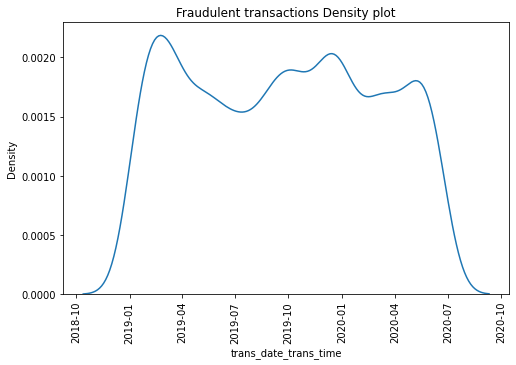

<Figure size 576x360 with 0 Axes>

In [ ]:
sns.kdeplot(fraud_trans.trans_date_trans_time)
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (8,5)
plt.title("Fraudulent transactions Density plot")
plt.show()
plt.savefig('Fraudulent_transactions_density.png')

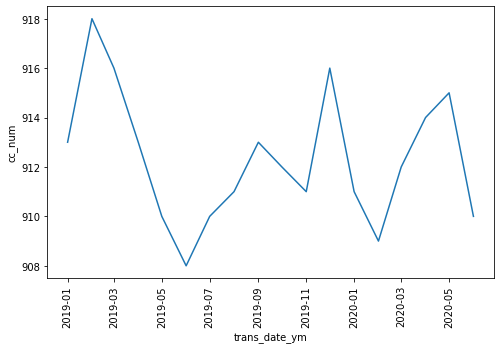

In [ ]:
sns.lineplot(data=overall_count, x="trans_date_ym", y="cc_num")
plt.xticks(rotation = 90)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


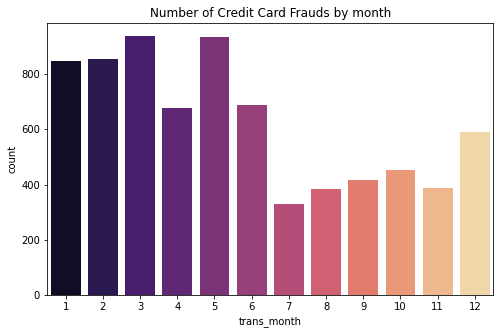

<Figure size 576x360 with 0 Axes>

In [ ]:
sns.countplot(fraud_trans['trans_month'],palette='magma')
plt.title("Number of Credit Card Frauds by month")
plt.show()
plt.savefig('frauds_by_month')


# Correlation Plot #

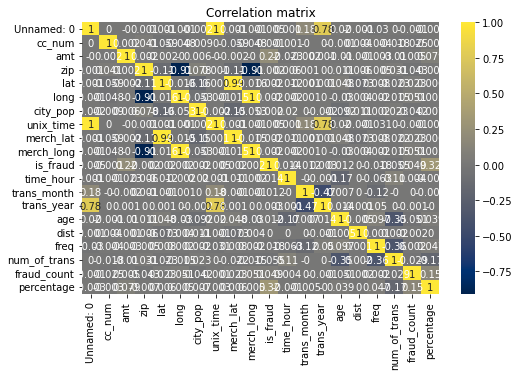

<Figure size 1800x1800 with 0 Axes>

In [ ]:
hm = sns.heatmap(train_set.corr().round(3), annot = True,cmap = 'cividis')
hm.set(title = "Correlation matrix")
plt.rcParams["figure.figsize"] = (25, 25)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()
plt.savefig('correlation.png')

In [ ]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#vif_data = pd.DataFrame()
#vif_data["feature"] = test_set.columns
#vif_data["VIF"] = [variance_inflation_factor(test_set.values, i) for i in range(len(test_set.columns))]

# Encoding Transformation #


In [ ]:
from sklearn.preprocessing import LabelEncoder

#Label encoding
le = LabelEncoder()
train_set["merchant"] = le.fit_transform(train_set["merchant"])
train_set['time_hour'] = le.fit_transform(train_set['time_hour'])
train_set['distance_binned'] = le.fit_transform(train_set['distance_binned'])
train_set['pop_binned'] = le.fit_transform(train_set['pop_binned'])
train_set['freq_binned'] = le.fit_transform(train_set['freq_binned'])
train_set['age_binned'] = le.fit_transform(train_set['age_binned'])

#Categorical encoding
train_set['state'] = pd.Categorical(train_set['state'])
train_set['city'] = pd.Categorical(train_set['city'])
train_set['job'] = pd.Categorical(train_set['job'])
train_set['state_code'] = train_set['state'].cat.codes
train_set['city_code'] = train_set['city'].cat.codes
train_set['job_code'] = train_set['job'].cat.codes

#One-hot encoding
df_train=pd.get_dummies(train_set[["category"]])
df_dum_train =pd.concat([train_set,df_train],axis=1)
df2_train = pd.get_dummies(df_dum_train[['gender']])
train_set2 = pd.concat([df_dum_train,df2_train], axis = 1)

train_set2



test_set["merchant"] = le.fit_transform(test_set["merchant"])
test_set['time_hour'] = le.fit_transform(test_set['time_hour'])
test_set['distance_binned'] = le.fit_transform(test_set['distance_binned'])
test_set['pop_binned'] = le.fit_transform(test_set['pop_binned'])
test_set['freq_binned'] = le.fit_transform(test_set['freq_binned'])
test_set['age_binned'] = le.fit_transform(test_set['age_binned'])

#Categorical encoding
test_set['state'] = pd.Categorical(test_set['state'])
test_set['city'] = pd.Categorical(test_set['city'])
test_set['job'] = pd.Categorical(test_set['job'])
test_set['state_code'] = test_set['state'].cat.codes
test_set['city_code'] = test_set['city'].cat.codes
test_set['job_code'] = test_set['job'].cat.codes

#One-hot encoding
df_test=pd.get_dummies(test_set[["category"]])
df_dum_test =pd.concat([test_set,df_test],axis=1)
df2_test = pd.get_dummies(df_dum_test[['gender']])
test_set2 = pd.concat([df_dum_test,df2_test], axis = 1)

test_set2

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,0,2020-06-21 12:14:25,2291163933867244,319,personal_care,2.860000,Jeff,Elliott,M,351 Darlene Green,...,0,0,0,0,1,0,0,0,0,1
1,606,2020-06-21 15:39:04,2291163933867244,202,kids_pets,17.150000,Jeff,Elliott,M,351 Darlene Green,...,0,1,0,0,0,0,0,0,0,1
2,4324,2020-06-22 15:24:57,2291163933867244,2,food_dining,89.550000,Jeff,Elliott,M,351 Darlene Green,...,0,0,0,0,0,0,0,0,0,1
3,4340,2020-06-22 15:29:43,2291163933867244,91,home,24.670000,Jeff,Elliott,M,351 Darlene Green,...,1,0,0,0,0,0,0,0,0,1
4,4590,2020-06-22 16:43:19,2291163933867244,184,travel,6.280000,Jeff,Elliott,M,351 Darlene Green,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,517197,2020-12-22 22:05:48,2242176657877538,670,shopping_pos,1041.510000,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,0,0,0,0,0,0,1,0,0,1
555715,517274,2020-12-22 22:18:07,2242176657877538,349,shopping_pos,868.090000,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,0,0,0,0,0,0,1,0,0,1
555716,517341,2020-12-22 22:31:48,2242176657877538,443,shopping_net,1039.420000,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,0,0,0,0,0,1,0,0,0,1
555717,517529,2020-12-22 23:06:03,2242176657877538,29,grocery_pos,289.270000,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
train_set['state_code'].nunique()

51

# Models #

* Logistic Regression
* Decision Trees
* Naive Bayes

In [ ]:
train_set2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 58 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   Unnamed: 0               1296675 non-null  int64         
 1   trans_date_trans_time    1296675 non-null  datetime64[ns]
 2   cc_num                   1296675 non-null  int64         
 3   merchant                 1296675 non-null  int64         
 4   category                 1296675 non-null  object        
 5   amt                      1296675 non-null  float64       
 6   first                    1296675 non-null  object        
 7   last                     1296675 non-null  object        
 8   gender                   1296675 non-null  object        
 9   street                   1296675 non-null  object        
 10  city                     1296675 non-null  category      
 11  state                    1296675 non-null  category      
 12  

In [ ]:
train_set2.groupby(['merchant'])['merch_lat','merch_long'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,merch_lat,merch_long
merchant,,
0,1844,1844
1,1763,1763
2,1751,1751
3,1895,1895
4,940,940
...,...,...
688,1297,1297
689,1804,1804
690,1695,1695


In [ ]:
train_set2['merch_lat'].loc[train_set2['merchant'] == 4]

1510      36.130946
1642      35.089448
4962      49.670251
7200      38.246081
8973      38.753646
             ...   
1288365   34.584218
1288571   34.500336
1292357   34.016072
1294906   36.039968
1295896   45.173585
Name: merch_lat, Length: 940, dtype: float64

In [ ]:
# Removing unnecessary columns

train_log =  train_set2.drop(columns=['Unnamed: 0','first','last','age','dist','freq','lat','long','city_pop','street','zip','unix_time','trans_date_trans_time', 'merch_lat','merch_long',
                                     'trans_date','trans_date_ym','time','time_hour','dob','trans_num','percentage','city','state','job','category','gender','trans_month','trans_year'], axis =1)

train_log.info()

test_log = test_set2.drop(columns=['Unnamed: 0','first','last','age','dist','freq','lat','long','city_pop','street','zip','unix_time','trans_date_trans_time','merch_lat','merch_long',
                                     'trans_date','trans_date_ym','time','time_hour','dob','trans_num','percentage','city','state','job','category','gender'], axis =1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cc_num                   1296675 non-null  int64  
 1   merchant                 1296675 non-null  int64  
 2   amt                      1296675 non-null  float64
 3   is_fraud                 1296675 non-null  int64  
 4   age_binned               1296675 non-null  int64  
 5   distance_binned          1296675 non-null  int64  
 6   pop_binned               1296675 non-null  int64  
 7   freq_binned              1296675 non-null  int64  
 8   num_of_trans             1296675 non-null  int64  
 9   fraud_count              1296675 non-null  int64  
 10  state_code               1296675 non-null  int8   
 11  city_code                1296675 non-null  int16  
 12  job_code                 1296675 non-null  int16  
 13  category_entertainment   1296675 non-null 

In [ ]:
train_log.head()

,cc_num,merchant,amt,is_fraud,age_binned,distance_binned,pop_binned,freq_binned,num_of_trans,fraud_count,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,2703186189652095,514,4.970000,0,1,0,5,6,2028,0,...,0,0,1,0,0,0,0,0,1,0
1,2703186189652095,537,114.790000,0,1,2,5,2,2028,0,...,0,1,0,0,0,0,0,0,1,0
2,2703186189652095,469,16.550000,0,1,1,5,4,2028,0,...,0,1,0,0,0,0,0,0,1,0
3,2703186189652095,349,27.700000,0,1,1,5,5,2028,0,...,0,0,1,0,0,0,0,0,1,0
4,2703186189652095,450,43.720000,0,1,2,5,1,2028,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_absolute_error, classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

X = train_log.drop(columns=['is_fraud'])
y = train_log['is_fraud'].values
X_testset = test_log.drop(columns = ['is_fraud'])
y_testset = test_log['is_fraud'].values
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=11)

## Logistic Regression ##

1. Without sampling, SMOTE and Undersampling
2. Hyper-Parameter tuning( C values =[0.1,1, 10, 100, 1000])
3. 3 fold Cross Validation
4. AUC value for train-test(70:30) split from train.csv 
5. Accuracy, Precision, recall,f-score for unseen test data from test.csv


In [ ]:
from imblearn import under_sampling
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=11)
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

pipeline = imbpipeline(steps = [['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000)]])


    
param_grid = {'classifier__C':[0.1,1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
#cv_score = grid_search.best_score_
#test_score = grid_search.score(X_test, y_test)
predict = grid_search.best_estimator_.predict(X_testset)
predict_prob = grid_search.best_estimator_.predict_proba(X_testset)
predict_split = grid_search.best_estimator_.predict(X_test)
predict_prob_split = grid_search.best_estimator_.predict_proba(X_test)
#print(f'Cross-validation score: {cv_score}\n Test score with train-test split: {test_score} \n Best Model Parameters : {grid_search.best_params_}')
print("======Logistic Regression Without Sampling ====== \n ")

print('Cross-Validation Score : %s ' %grid_search.best_score_)
print('Test score with train-test split : ',grid_search.score(X_test, y_test))
print('Best Model parameters : ',grid_search.best_params_)

print("\n Accuracy score for 70:30 Testset :  %s" %accuracy_score(y_test,predict_split))
print("\n Classification report for 70:30 testset \n %s" %(classification_report(y_test,predict_split)))

print("\n Accuracy score for unseen Testset %s" %accuracy_score(y_testset,predict))
print("\n Classification report for unseen testset  \n %s" %(classification_report(y_testset,predict)))

======Logistic Regression Without Sampling ====== 
 
Cross-Validation Score : 0.890092098692043 
Test score with train-test split :  0.8939919350351648
Best Model parameters :  {'classifier__C': 1000}

 Accuracy score for 70:30 Testset :  0.9940900198713121

 Classification report for 70:30 testset 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    386751
           1       0.39      0.04      0.07      2252

    accuracy                           0.99    389003
   macro avg       0.69      0.52      0.53    389003
weighted avg       0.99      0.99      0.99    389003


 Accuracy score for unseen Testset 0.9960303678657739

 Classification report for unseen testset  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.43      0.10      0.16      2145

    accuracy                           1.00    555719
   macro avg       0.72      0.55      0.58    55571

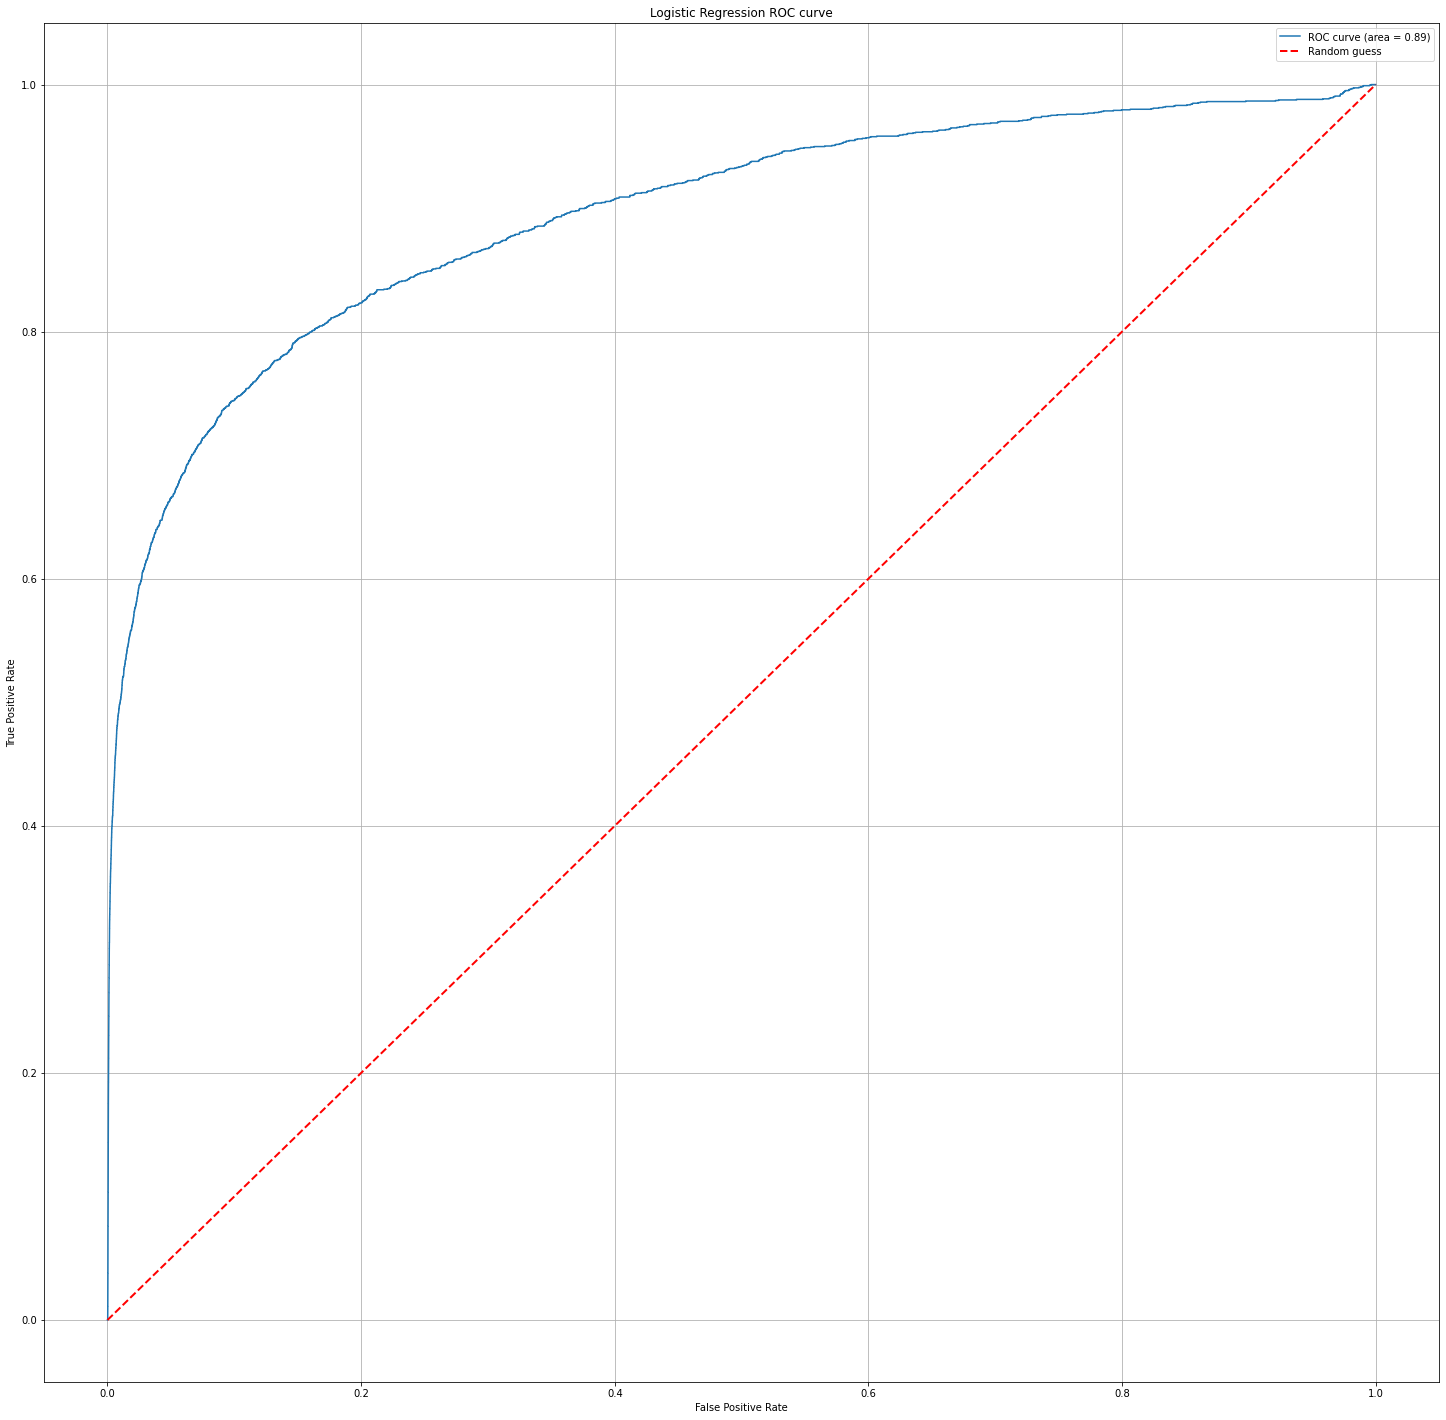

<Figure size 1800x1800 with 0 Axes>

In [ ]:
fpr, tpr, thresh = metrics.roc_curve(y_test, predict_prob_split[:,1])
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('Logistic Regression ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()
plt.savefig('lr_roc.png')

In [ ]:
from imblearn import under_sampling
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=11)
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

pipeline_lr_ru = imbpipeline(steps = [['under', under_sampling.RandomUnderSampler(random_state=100)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000)]])


    
param_grid = {'classifier__C':[0.1,1, 10, 100, 1000]}
grid_search_lr_ru = GridSearchCV(estimator=pipeline_lr_ru,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search_lr_ru.fit(X_train, y_train)

# Unseen testset
predict_lr_ru = grid_search_lr_ru.best_estimator_.predict(X_testset)
predict_prob_lr_ru = grid_search_lr_ru.best_estimator_.predict_proba(X_testset)

#70:30 split CV best model
predict_split_lr_ru = grid_search_lr_ru.best_estimator_.predict(X_test)
predict_prob_split_lr_ru = grid_search_lr_ru.best_estimator_.predict_proba(X_test)
#print(f'Cross-validation score: {cv_score}\n Test score with train-test split: {test_score} \n Best Model Parameters : {grid_search.best_params_}')
print("======Logistic Regression With Undersampling ====== \n ")

print('Cross-Validation Score : %s ' %grid_search_lr_ru.best_score_)
print('Test score with train-test split : ',grid_search_lr_ru.score(X_test, y_test))
print('Best Model parameters : ',grid_search_lr_ru.best_params_)

print("\n Accuracy score for 70:30 Testset :  %s" %accuracy_score(y_test,predict_split_lr_ru))
print("\n Classification report for 70:30 testset \n %s" %(classification_report(y_test,predict_split_lr_ru)))

print("\n Accuracy score for unseen Testset %s" %accuracy_score(y_testset,predict_lr_ru))
print("\n Classification report for unseen testset  \n %s" %(classification_report(y_testset,predict_lr_ru)))








======Logistic Regression With Undersampling ====== 
 
Cross-Validation Score : 0.9440909931379008 
Test score with train-test split :  0.9443147883809914
Best Model parameters :  {'classifier__C': 1000}

 Accuracy score for 70:30 Testset :  0.8849648974429503

 Classification report for 70:30 testset 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94    386751
           1       0.04      0.84      0.08      2252

    accuracy                           0.88    389003
   macro avg       0.52      0.86      0.51    389003
weighted avg       0.99      0.88      0.93    389003


 Accuracy score for unseen Testset 0.9125439295759188

 Classification report for unseen testset  
               precision    recall  f1-score   support

           0       1.00      0.91      0.95    553574
           1       0.04      0.91      0.07      2145

    accuracy                           0.91    555719
   macro avg       0.52      0.91      0.51    55

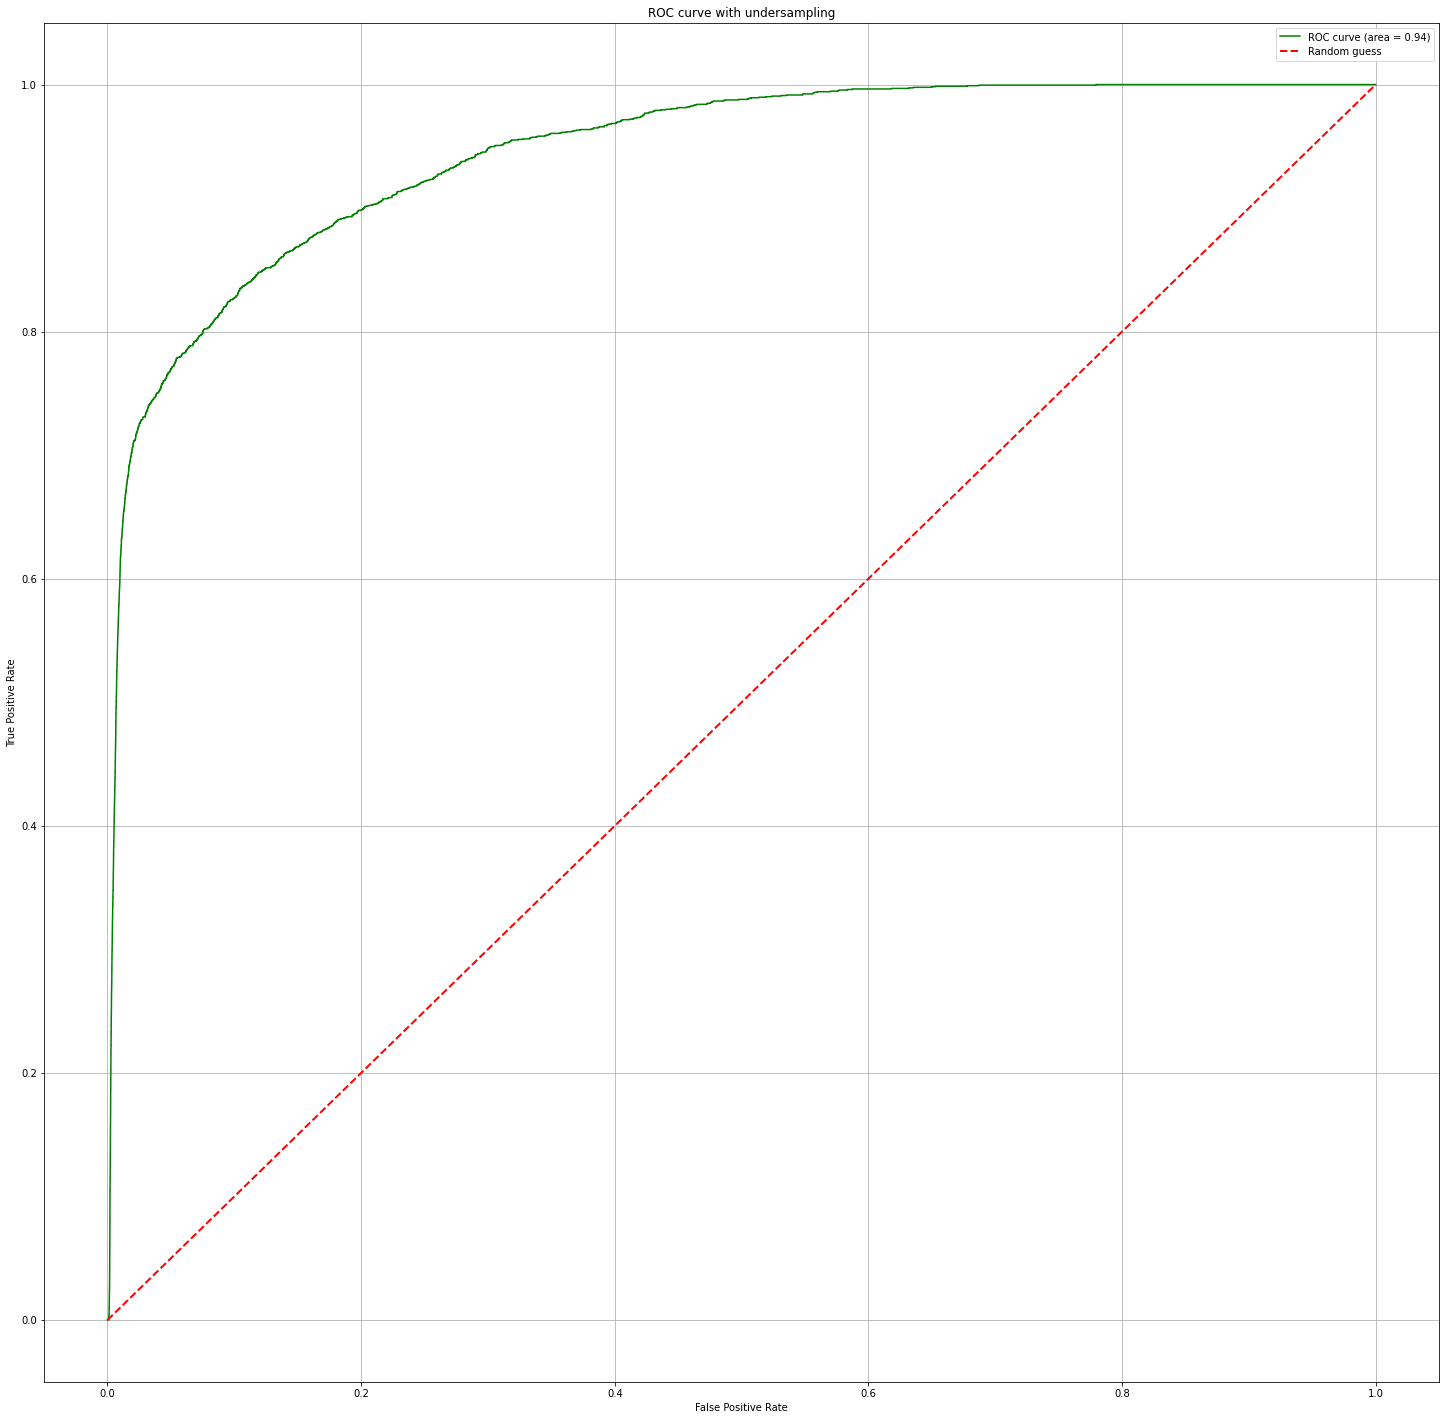

<Figure size 1800x1800 with 0 Axes>

In [ ]:
fpr_ru, tpr_ru, thresh_ru = metrics.roc_curve(y_test, predict_prob_split_lr_ru[:,1])
auc_ru = metrics.auc(fpr_ru, tpr_ru)
plt.plot(fpr_ru, tpr_ru, label='ROC curve (area = %.2f)' %auc_ru, color = 'g')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve with undersampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()
plt.savefig('roc_lr_ru.png')

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=11)
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)


param_grid = {'classifier__C':[1,10,100]}

pipeline_lr_sm = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000)]])


    
grid_search_lr_sm = GridSearchCV(estimator=pipeline_lr_sm,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search_lr_sm.fit(X_train, y_train)
#cv_score = grid_search.best_score_
#test_score = grid_search.score(X_test, y_test)
predict_lr_sm = grid_search_lr_sm.best_estimator_.predict(X_testset)
predict_prob_lr_sm = grid_search_lr_sm.best_estimator_.predict_proba(X_testset)

predict_split_lr_sm = grid_search_lr_sm.best_estimator_.predict(X_test)
predict_prob_split_lr_sm = grid_search_lr_sm.best_estimator_.predict_proba(X_test)
#print(f'Cross-validation score: {cv_score}\n Test score with train-test split: {test_score} \n Best Model Parameters : {grid_search.best_params_}')

print("========Logistic Regression with SMOTE======== \n ")
print('Cross-Validation Score : %s ' %grid_search_lr_sm.best_score_)
print('Test score with train-test split : ',grid_search_lr_sm.score(X_test, y_test))
print('Best Model parameters : ',grid_search_lr_sm.best_params_)

print("\n Accuracy score for 70:30 Testset :  %s" %accuracy_score(y_test,predict_split_lr_sm))
print("\n Classification report for 70:30 testset \n %s" %(classification_report(y_test,predict_split_lr_sm)))

print("\n Accuracy score for unseen Testset %s" %accuracy_score(y_testset,predict_lr_sm))
print("\n Classification report for unseen testset  \n %s" %(classification_report(y_testset,predict_lr_sm)))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


========Logistic Regression with SMOTE======== 
 
Cross-Validation Score : 0.9338115501607908 
Test score with train-test split :  0.9332972087322922
Best Model parameters :  {'classifier__C': 100}

 Accuracy score for 70:30 Testset :  0.9831775076284759

 Classification report for 70:30 testset 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    386751
           1       0.22      0.72      0.33      2252

    accuracy                           0.98    389003
   macro avg       0.61      0.85      0.66    389003
weighted avg       0.99      0.98      0.99    389003


 Accuracy score for unseen Testset 0.9836050234021151

 Classification report for unseen testset  
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.16      0.73      0.26      2145

    accuracy                           0.98    555719
   macro avg       0.58      0.86      0.62    555719
w

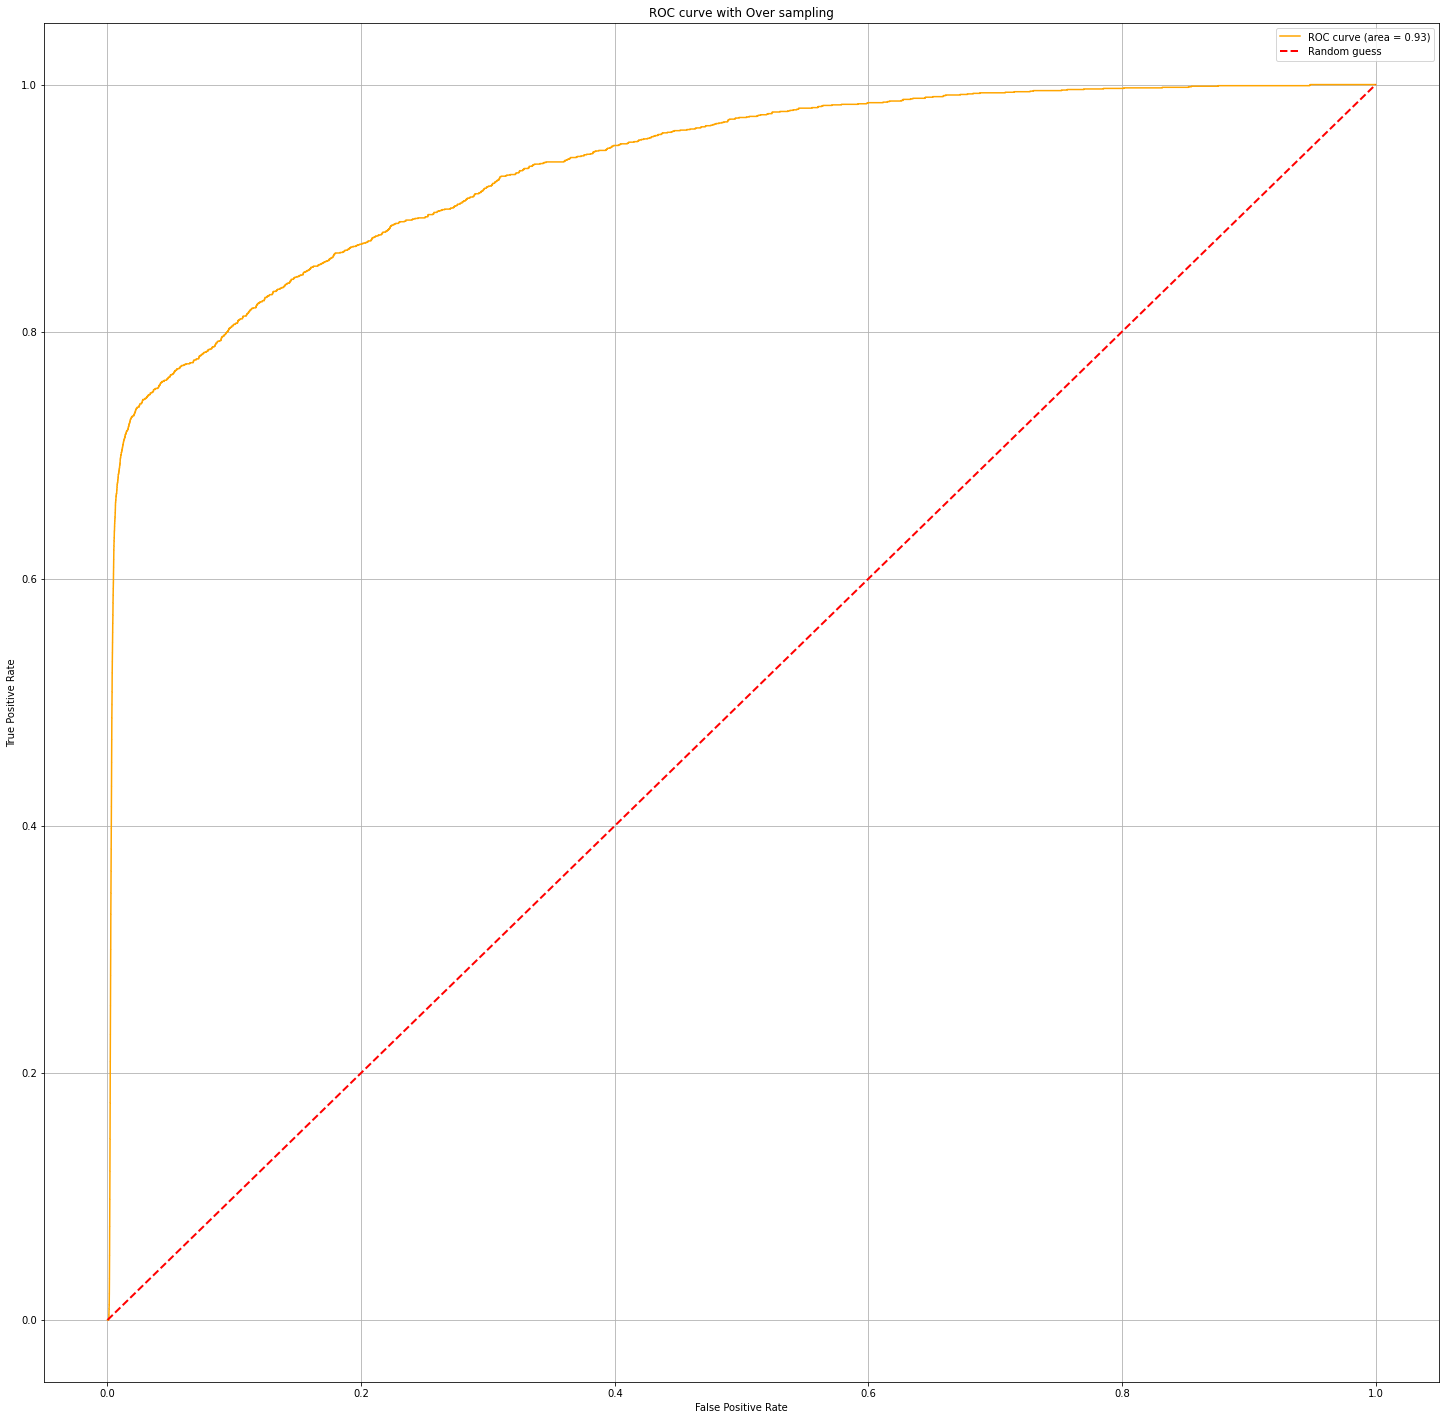

<Figure size 1800x1800 with 0 Axes>

In [ ]:
fpr_sm, tpr_sm, thresh_sm = metrics.roc_curve(y_test, predict_prob_split_lr_sm[:,1])
auc_sm = metrics.auc(fpr_sm, tpr_sm)
plt.plot(fpr_sm, tpr_sm, label='ROC curve (area = %.2f)' %auc_sm,color ='orange')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve with Over sampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()
plt.savefig('roc_lr_sm.png')

## Decision Trees ##
1. SMOTE and Undersampling
2. Hyper-Parameter tuning( Max Depth values =[5,10,15])
3. 3 fold Cross Validation
4. AUC value for train-test(70:30) split from train.csv 
5. Accuracy, Precision, recall,f-score for unseen test data from test.csv

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=11)
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)


param_grid = {'classifier__max_depth':[5,10,15]}

pipeline_dt = imbpipeline(steps = [
                                ['scaler', MinMaxScaler()],
                                ['classifier', DecisionTreeClassifier()]])


    
grid_search_dt = GridSearchCV(estimator=pipeline_dt,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search_dt.fit(X_train, y_train)
#cv_score = grid_search.best_score_
#test_score = grid_search.score(X_test, y_test)
predict_dt = grid_search_dt.best_estimator_.predict(X_testset)
predict_split_dt = grid_search_dt.best_estimator_.predict(X_test)

predict_prob_dt = grid_search_dt.best_estimator_.predict_proba(X_testset)
predict_prob_split_dt = grid_search_dt.best_estimator_.predict_proba(X_test)
#print(f'Cross-validation score: {cv_score}\n Test score with train-test split: {test_score} \n Best Model Parameters : {grid_search.best_params_}')

print("========Decision Trees without Sampling ======== \n ")
print('Cross-Validation Score : %s ' %grid_search_dt.best_score_)
print('Test score with train-test split : ',grid_search_dt.score(X_test, y_test))
print('Best Model parameters : ',grid_search_dt.best_params_)

print("\n Accuracy score for 70:30 Testset :  %s" %accuracy_score(y_test,predict_split_dt))
print("\n Classification report for 70:30 testset \n %s" %(classification_report(y_test,predict_split_dt)))

print("\n Accuracy score for unseen Testset %s" %accuracy_score(y_testset,predict_dt))
print("\n Classification report for unseen testset  \n %s" %(classification_report(y_testset,predict_dt)))

========Decision Trees without Sampling ======== 
 
Cross-Validation Score : 0.9598833256965172 
Test score with train-test split :  0.9740446299564427
Best Model parameters :  {'classifier__max_depth': 10}

 Accuracy score for 70:30 Testset :  0.9976555450729172

 Classification report for 70:30 testset 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.85      0.73      0.78      2252

    accuracy                           1.00    389003
   macro avg       0.92      0.86      0.89    389003
weighted avg       1.00      1.00      1.00    389003


 Accuracy score for unseen Testset 0.9171595716540194

 Classification report for unseen testset  
               precision    recall  f1-score   support

           0       1.00      0.92      0.96    553574
           1       0.04      0.77      0.07      2145

    accuracy                           0.92    555719
   macro avg       0.52      0.85      0.51   

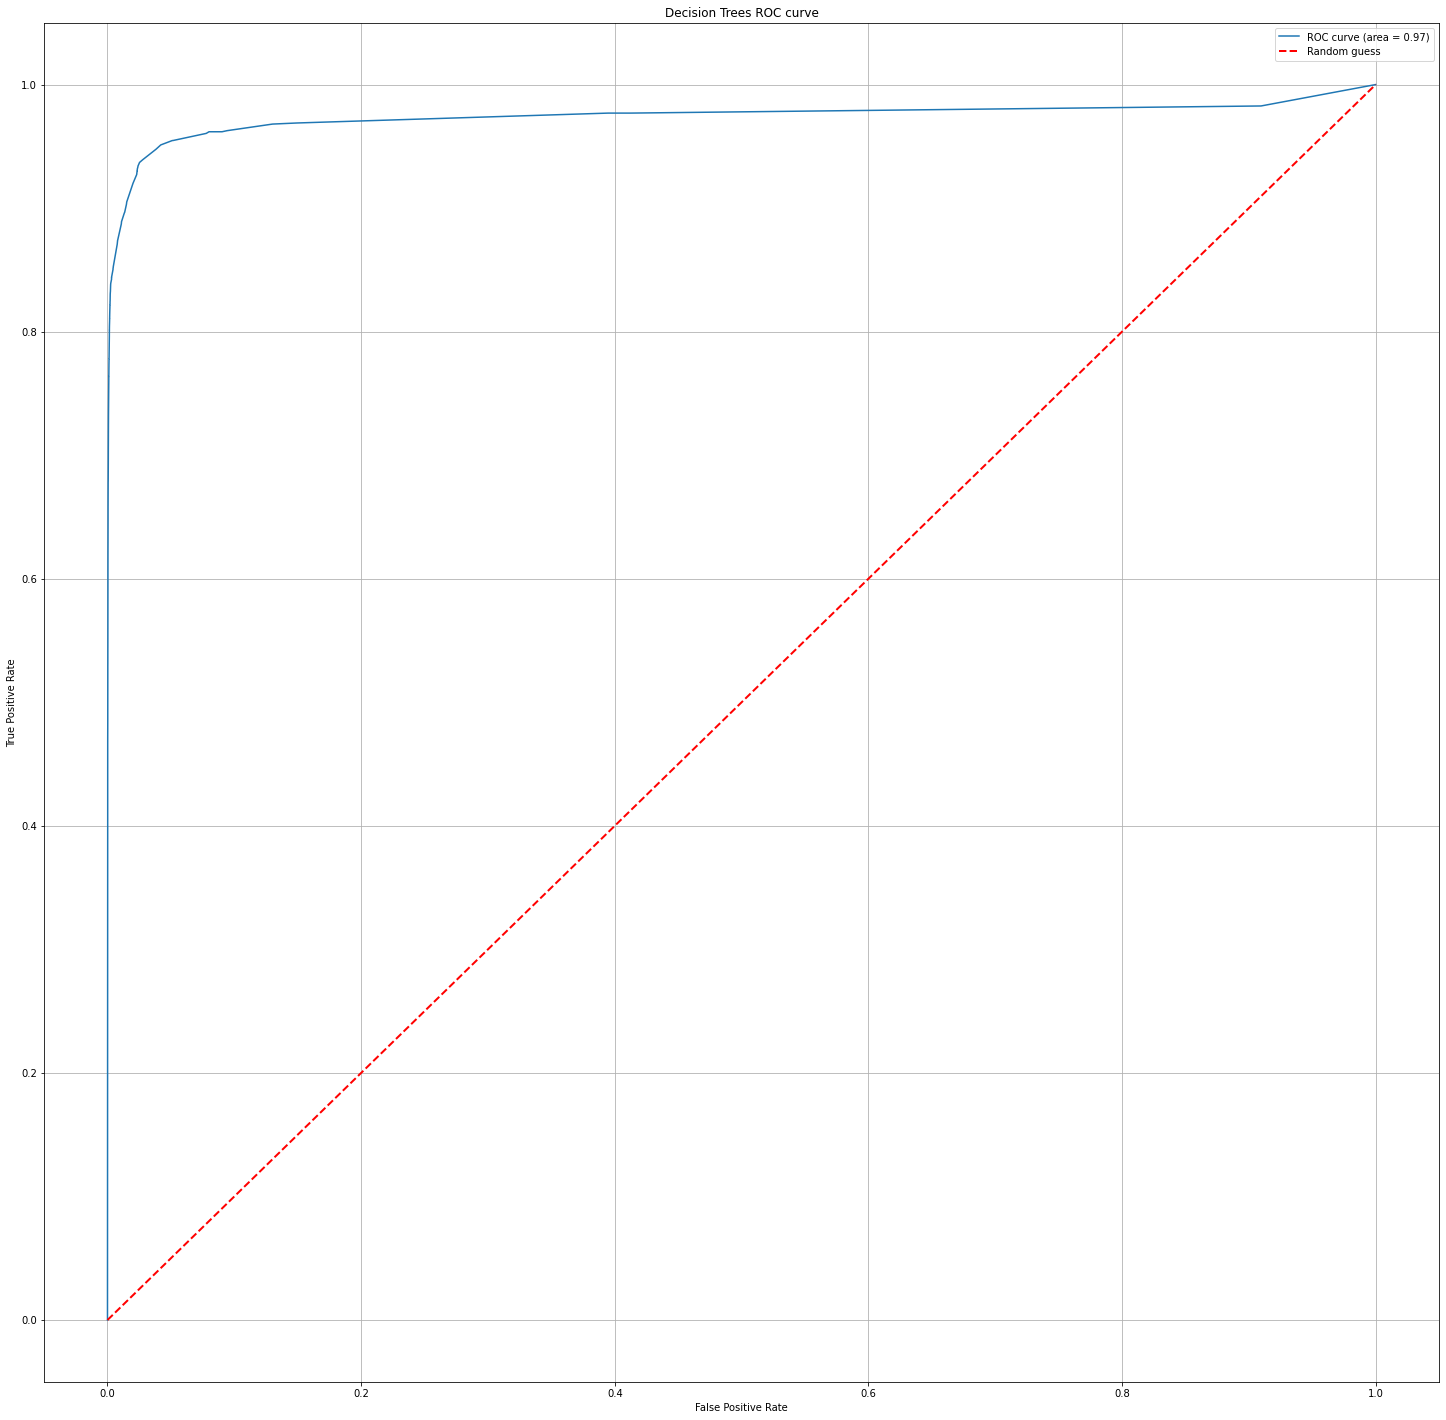

<Figure size 1800x1800 with 0 Axes>

In [ ]:
fpr_dt, tpr_dt, thresh_dt = metrics.roc_curve(y_test, predict_prob_split_dt[:,1])
auc_dt = metrics.auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label='ROC curve (area = %.2f)' %auc_dt)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('Decision Trees ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()
plt.savefig('roc_dt.png')

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=11)
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)


param_grid = {'classifier__max_depth':[5,10,15]}

pipeline_dt_ru = imbpipeline(steps = [['under', under_sampling.RandomUnderSampler(random_state=100)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', DecisionTreeClassifier()]])


    
grid_search_dt_ru = GridSearchCV(estimator=pipeline_dt_ru,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search_dt_ru.fit(X_train, y_train)
#cv_score = grid_search.best_score_
#test_score = grid_search.score(X_test, y_test)
predict_dt_ru = grid_search_dt_ru.best_estimator_.predict(X_testset)
predict_split_dt_ru = grid_search_dt_ru.best_estimator_.predict(X_test)

predict_prob_dt_ru = grid_search_dt_ru.best_estimator_.predict_proba(X_testset)
predict_prob_split_dt_ru = grid_search_dt_ru.best_estimator_.predict_proba(X_test)

print("========Decision Trees with Undersampling======== \n ")
print('Cross-Validation Score : %s ' %grid_search_dt_ru.best_score_)
print('Test score with train-test split : ',grid_search_dt_ru.score(X_test, y_test))
print('Best Model parameters : ',grid_search_dt_ru.best_params_)

print("\n Accuracy score for 70:30 Testset :  %s" %accuracy_score(y_test,predict_split_dt_ru))
print("\n Classification report for 70:30 testset \n %s" %(classification_report(y_test,predict_split_dt_ru)))

print("\n Accuracy score for unseen Testset %s" %accuracy_score(y_testset,predict_dt_ru))
print("\n Classification report for unseen testset  \n %s" %(classification_report(y_testset,predict_dt_ru)))

========Decision Trees with Undersampling======== 
 
Cross-Validation Score : 0.9723650975334307 
Test score with train-test split :  0.9786417458402711
Best Model parameters :  {'classifier__max_depth': 10}

 Accuracy score for 70:30 Testset :  0.9522420135577361

 Classification report for 70:30 testset 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98    386751
           1       0.11      0.98      0.19      2252

    accuracy                           0.95    389003
   macro avg       0.55      0.96      0.58    389003
weighted avg       0.99      0.95      0.97    389003


 Accuracy score for unseen Testset 0.9771143329632422

 Classification report for unseen testset  
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.14      0.98      0.25      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.98      0.62  

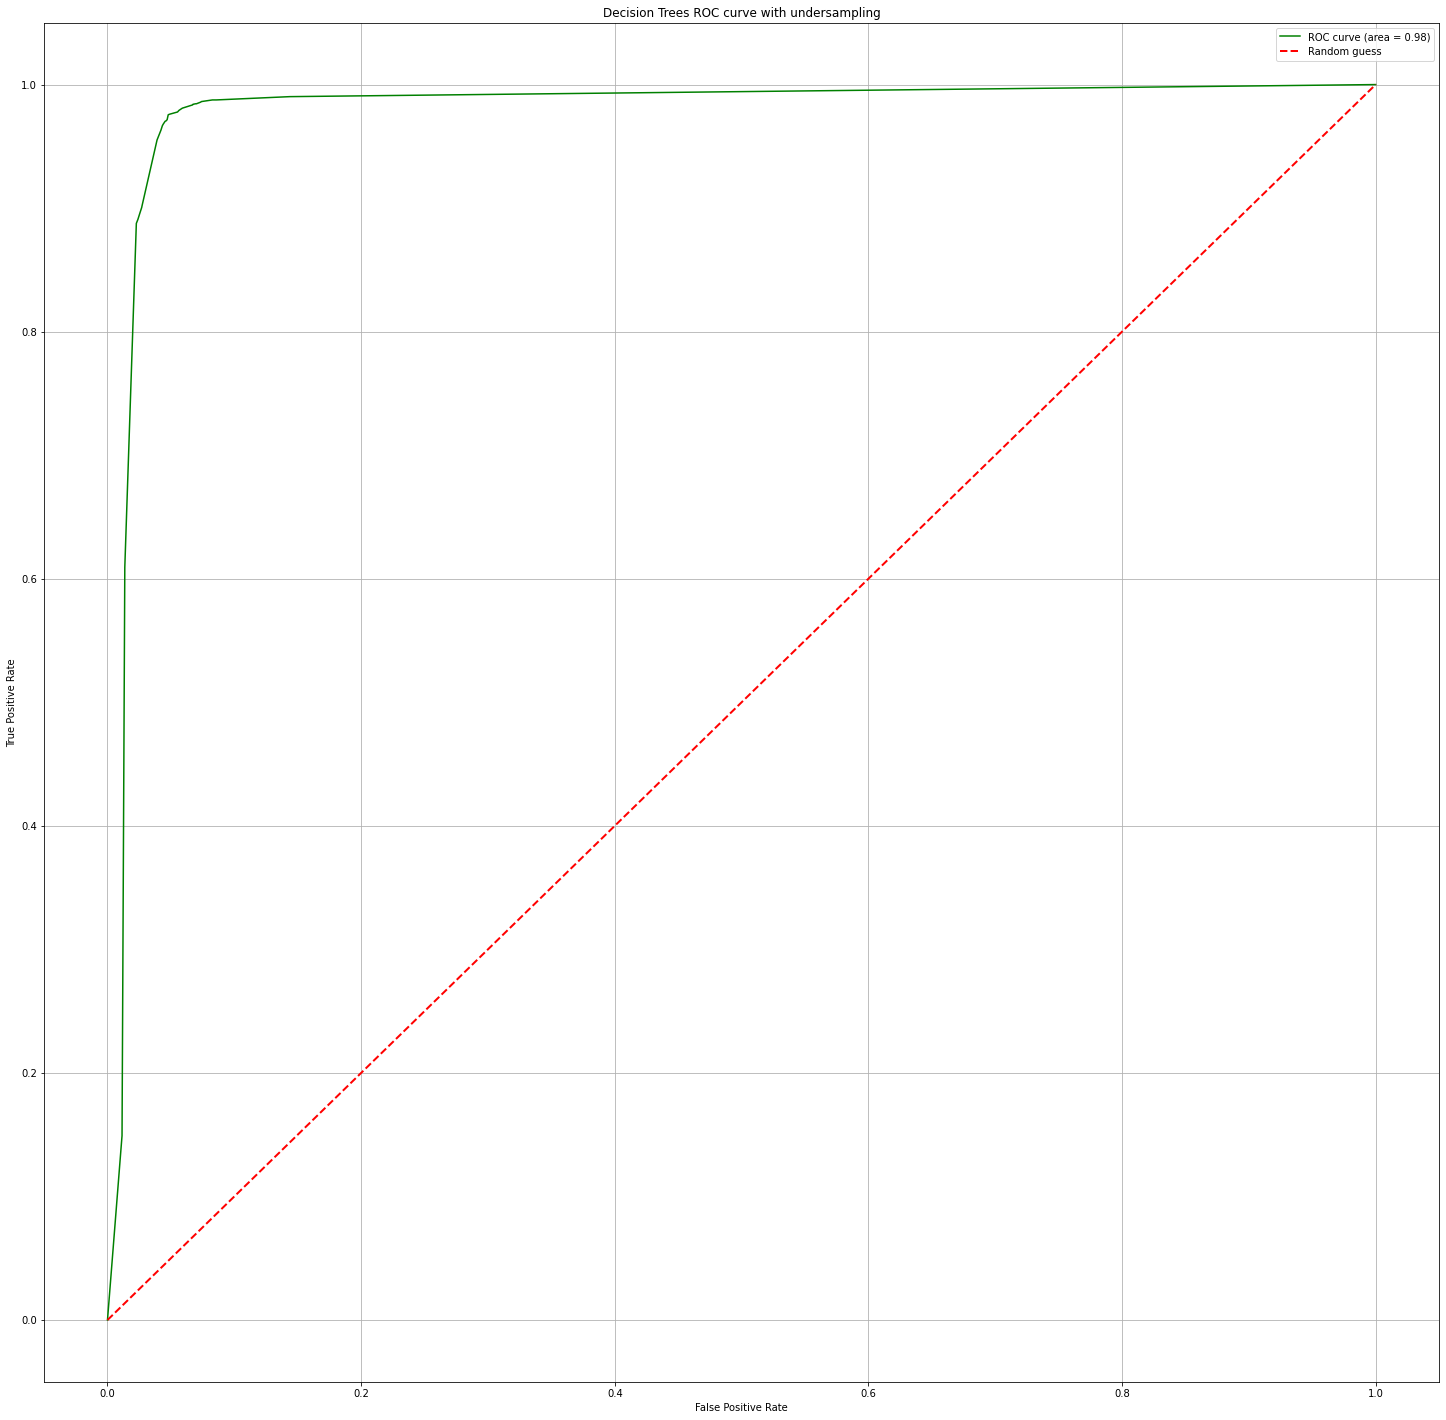

<Figure size 1800x1800 with 0 Axes>

In [ ]:
fpr_dt_ru, tpr_dt_ru, thresh_dt_ru = metrics.roc_curve(y_test, predict_prob_split_dt_ru[:,1])
auc_dt_ru = metrics.auc(fpr_dt_ru, tpr_dt_ru)
plt.plot(fpr_dt_ru, tpr_dt_ru, label='ROC curve (area = %.2f)' %auc_dt_ru,color = 'g')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('Decision Trees ROC curve with undersampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()
plt.savefig('roc_dt_ru.png')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=11)
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)


param_grid = {'classifier__max_depth':[5,10,15]}

pipeline_dt_sm = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', DecisionTreeClassifier()]])


    
grid_search_dt_sm = GridSearchCV(estimator=pipeline_dt_sm,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search_dt_sm.fit(X_train, y_train)
#cv_score = grid_search.best_score_
#test_score = grid_search.score(X_test, y_test)
predict_dt_sm = grid_search_dt_sm.best_estimator_.predict(X_testset)
predict_split_dt_sm = grid_search_dt_sm.best_estimator_.predict(X_test)

predict_prob_dt_sm = grid_search_dt_sm.best_estimator_.predict_proba(X_testset)
predict_prob_split_dt_sm = grid_search_dt_sm.best_estimator_.predict_proba(X_test)


print("========Decision Trees with SMOTE======== \n ")
print('Cross-Validation Score : %s ' %grid_search_dt_sm.best_score_)
print('Test score with train-test split : ',grid_search_dt_sm.score(X_test, y_test))
print('Best Model parameters : ',grid_search_dt_sm.best_params_)

print("\n Accuracy score for 70:30 Testset :  %s" %accuracy_score(y_test,predict_split_dt_sm))
print("\n Classification report for 70:30 testset \n %s" %(classification_report(y_test,predict_split_dt_sm)))

print("\n Accuracy score for unseen Testset %s" %accuracy_score(y_testset,predict_dt_sm))
print("\n Classification report for unseen testset  \n %s" %(classification_report(y_testset,predict_dt_sm)))

========Decision Trees with SMOTE======== 
 
Cross-Validation Score : 0.9694206309579855 
Test score with train-test split :  0.974762447842059
Best Model parameters :  {'classifier__max_depth': 10}

 Accuracy score for 70:30 Testset :  0.9717482898589471

 Classification report for 70:30 testset 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    386751
           1       0.16      0.88      0.27      2252

    accuracy                           0.97    389003
   macro avg       0.58      0.93      0.63    389003
weighted avg       0.99      0.97      0.98    389003


 Accuracy score for unseen Testset 0.9258348193961337

 Classification report for unseen testset  
               precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.05      0.93      0.09      2145

    accuracy                           0.93    555719
   macro avg       0.52      0.93      0.52    555719


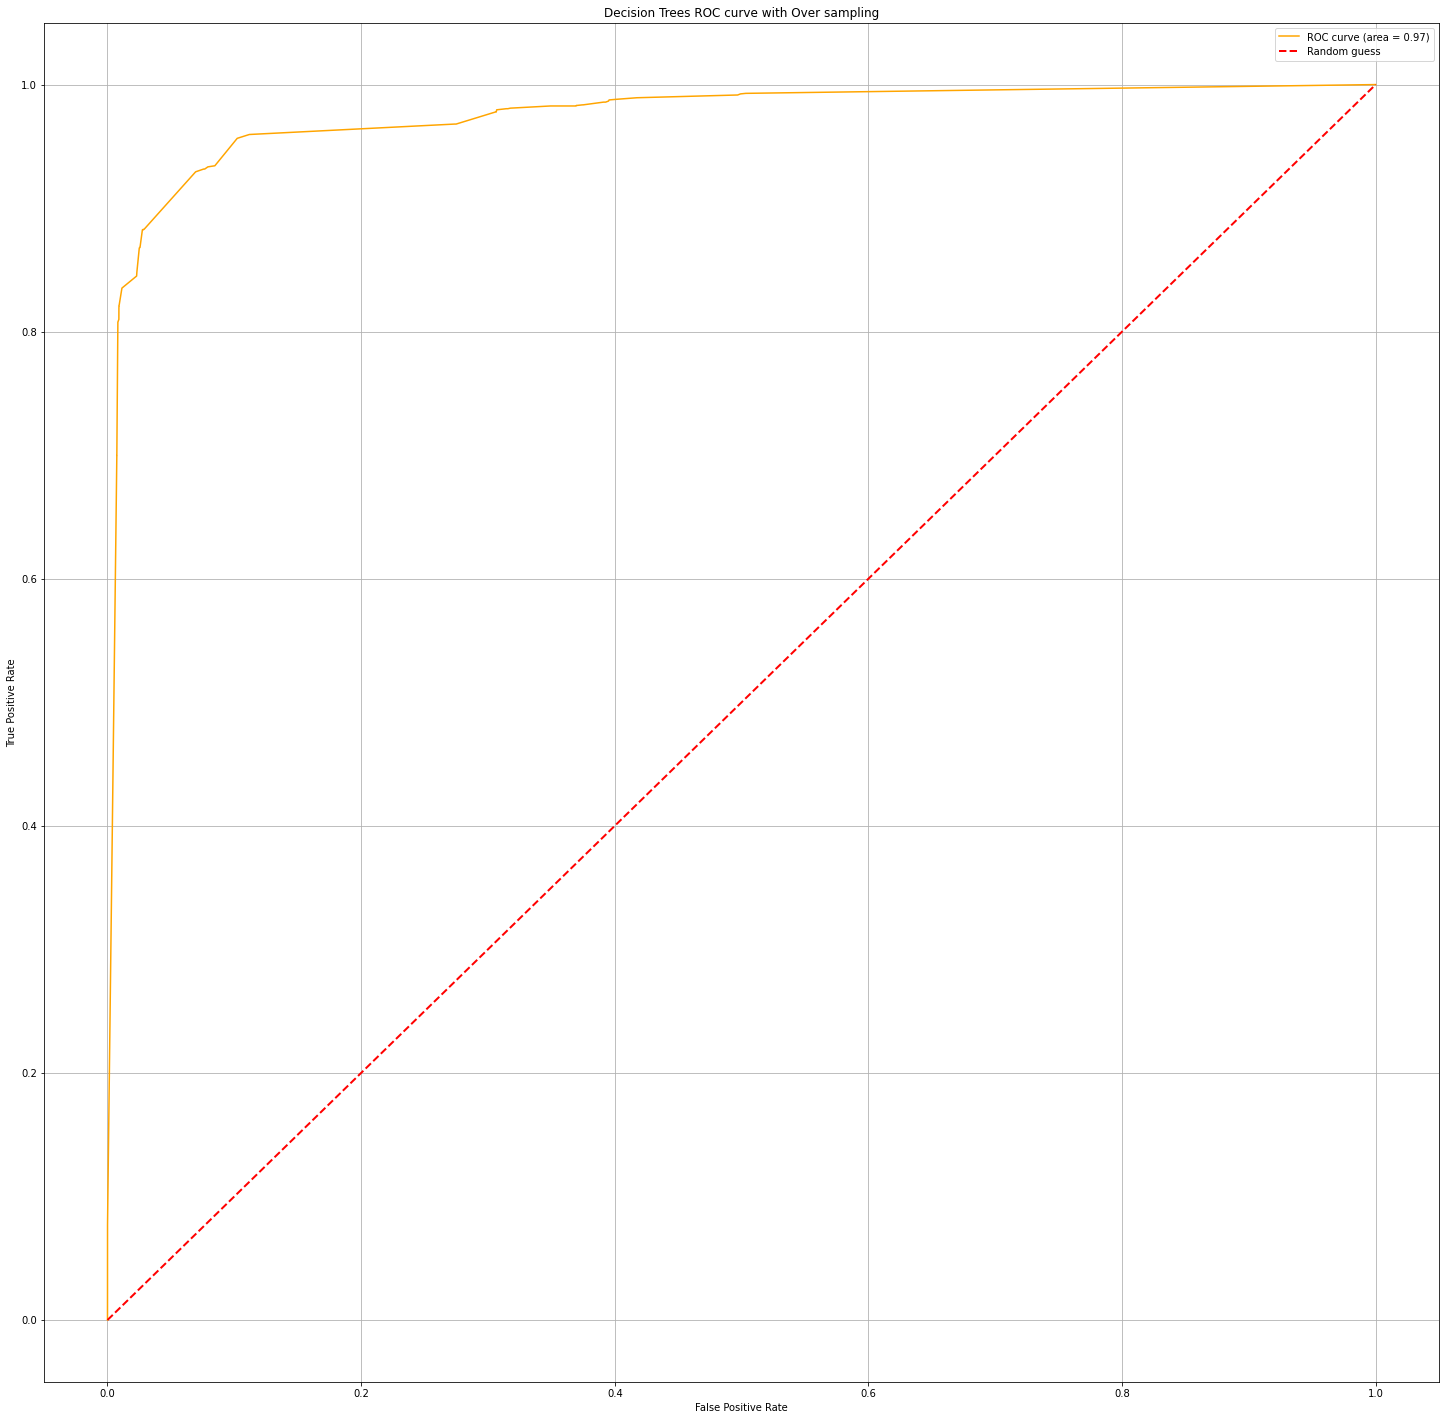

<Figure size 1800x1800 with 0 Axes>

In [ ]:
fpr_dt_sm, tpr_dt_sm, thresh_dt_sm = metrics.roc_curve(y_test, predict_prob_split_dt_sm[:,1])
auc_dt_sm = metrics.auc(fpr_dt_sm, tpr_dt_sm)
plt.plot(fpr_dt_sm, tpr_dt_sm, label='ROC curve (area = %.2f)' %auc_dt_sm,color = 'orange')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('Decision Trees ROC curve with Over sampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()
plt.savefig('roc_dt_sm.png')

## Naive Bayes ##

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=11)

In [ ]:
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
nb = GaussianNB()
#X_train,y_train = 
model_v3 = nb.fit(X_train,y_train)
ypred1 = model_v3.predict(X_test)
ypred_testset = model_v3.predict(X_testset)
print("Naive Bayes without Sampling and CV on 70:30 train-test split")
print('Accuracy Score : ', accuracy_score(y_test,ypred1))
print("Classification Report : \n", classification_report(y_test,ypred1))

print("Naive Bayes without Sampling and CV unseen trainset")
print('Accuracy Score : ', accuracy_score(y_testset,ypred_testset))
print("Classification Report : \n", classification_report(y_testset,ypred_testset))


predict_prob_nb = model_v3.predict_proba(X_testset)
predict_prob_split_nb = model_v3.predict_proba(X_test)

Naive Bayes without Sampling and CV on 70:30 train-test split
Accuracy Score :  0.9942108415616332
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    386751
           1       0.00      0.00      0.00      2252

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003

Naive Bayes without Sampling and CV unseen trainset
Accuracy Score :  0.9961401355721147
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=11)
from imblearn import over_sampling

nb = GaussianNB()
smte = over_sampling.SMOTE(random_state=100)
X_train_sm,y_train_sm = smte.fit_resample(X_train, y_train)
model_v3 = nb.fit(X_train_sm,y_train_sm)
ypred1 = model_v3.predict(X_test)
ypred_testset = model_v3.predict(X_testset)
print("Naive Bayes with SMOTE on 70:30 train-test split")
print('Accuracy Score : ', accuracy_score(y_test,ypred1))
print("Classification Report : \n", classification_report(y_test,ypred1))
print('\n')
print("Naive Bayes with SMOTE unseen trainset")
print('Accuracy Score : ', accuracy_score(y_testset,ypred_testset))
print("Classification Report : \n", classification_report(y_testset,ypred_testset))

Naive Bayes with SMOTE on 70:30 train-test split
Accuracy Score :  0.09614835875301733
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.09      0.17    386751
           1       0.01      0.91      0.01      2252

    accuracy                           0.10    389003
   macro avg       0.50      0.50      0.09    389003
weighted avg       0.99      0.10      0.17    389003



Naive Bayes with SMOTE unseen trainset
Accuracy Score :  0.09495986280836179
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.09      0.17    553574
           1       0.00      0.92      0.01      2145

    accuracy                           0.09    555719
   macro avg       0.50      0.50      0.09    555719
weighted avg       0.99      0.09      0.17    555719



In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=11)
from imblearn.under_sampling import RandomUnderSampler
nb = GaussianNB()
rus = RandomUnderSampler(random_state=42)
X_train_ru, y_train_ru = rus.fit_resample(X_train, y_train)
model_v3 = nb.fit(X_train_ru,y_train_ru)
ypred1 = model_v3.predict(X_test)
ypred_testset = model_v3.predict(X_testset)
print("Naive Bayes with Under Sampling on 70:30 train-test split")
print('Accuracy Score : ', accuracy_score(y_test,ypred1))
print("Classification Report : \n", classification_report(y_test,ypred1))
print('\n')
print("Naive Bayes with UnderSampling unseen trainset")
print('Accuracy Score : ', accuracy_score(y_testset,ypred_testset))
print("Classification Report : \n", classification_report(y_testset,ypred_testset))

Naive Bayes with Under Sampling on 70:30 train-test split
Accuracy Score :  0.09614835875301733
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.09      0.17    386751
           1       0.01      0.91      0.01      2252

    accuracy                           0.10    389003
   macro avg       0.50      0.50      0.09    389003
weighted avg       0.99      0.10      0.17    389003



Naive Bayes with UnderSampling unseen trainset
Accuracy Score :  0.09495986280836179
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.09      0.17    553574
           1       0.00      0.92      0.01      2145

    accuracy                           0.09    555719
   macro avg       0.50      0.50      0.09    555719
weighted avg       0.99      0.09      0.17    555719



In [ ]:
import xgboost as xgb

params = {'objective':'binary:logistic'}




X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=11)
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)


param_grid = {'objective':'binary:logistic'}

pipeline_dt = imbpipeline(steps = [
                                ['scaler', MinMaxScaler()],
                                ['classifier', xgb.XGBRegressor()]])


    
grid_search_dt = GridSearchCV(estimator=pipeline_dt,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search_dt.fit(X_train, y_train)
#cv_score = grid_search.best_score_
#test_score = grid_search.score(X_test, y_test)
predict_dt = grid_search_dt.best_estimator_.predict(X_testset)
predict_split_dt = grid_search_dt.best_estimator_.predict(X_test)

predict_prob_dt = grid_search_dt.best_estimator_.predict_proba(X_testset)
predict_prob_split_dt = grid_search_dt.best_estimator_.predict_proba(X_test)
#print(f'Cross-validation score: {cv_score}\n Test score with train-test split: {test_score} \n Best Model Parameters : {grid_search.best_params_}')

print("========Decision Trees without Sampling ======== \n ")
print('Cross-Validation Score : %s ' %grid_search_dt.best_score_)
print('Test score with train-test split : ',grid_search_dt.score(X_test, y_test))
print('Best Model parameters : ',grid_search_dt.best_params_)

print("\n Accuracy score for 70:30 Testset :  %s" %accuracy_score(y_test,predict_split_dt))
print("\n Classification report for 70:30 testset \n %s" %(classification_report(y_test,predict_split_dt)))

print("\n Accuracy score for unseen Testset %s" %accuracy_score(y_testset,predict_dt))
print("\n Classification report for unseen testset  \n %s" %(classification_report(y_testset,predict_dt)))

ValueError: ignored